In [1]:
import torch

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x, y = iris.data, iris.target

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64) # y should be int64 tensor

In [3]:
from torch import nn, optim

net = nn.Linear(x.size()[1], 3)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.05)

In [4]:
losses = []
for e in range(150):
    optimizer.zero_grad()
    
    y_pred = net(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss)

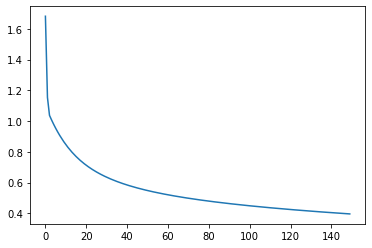

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [6]:
from sklearn.metrics import f1_score
_, pred = torch.max(net(x), 1) # max return value, index

f1_score(y, pred, average='macro')

0.9665831244778613

In [7]:
from sklearn.datasets import load_digits
data = load_digits()
x, y = data.data, data.target
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

net = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10),
        nn.Softmax(dim=1)
)

In [8]:
loss_fs = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [9]:
losses = []
for e in range(200):
    optimizer.zero_grad()
    
    y_pred = net(x)
    loss = loss_fs(y_pred, y)
    
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss)

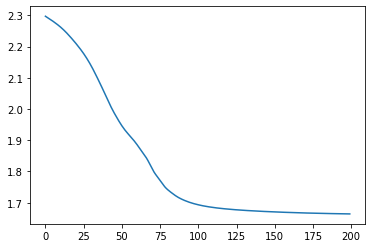

In [10]:
plt.plot(losses)